In [1]:
# This just lets the output of the following code samples
#  display inline on this page, at an appropriate size.
from pylab import rcParams

%matplotlib inline
rcParams['figure.figsize'] = (8,6)

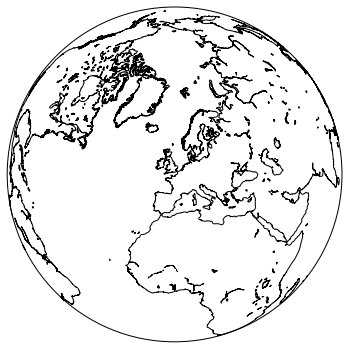

In [2]:
#Create a simple basemap

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
 
# make sure the value of resolution is a lowercase L,
#  for 'low', not a numeral 1
my_map = Basemap(projection='ortho', lat_0=50, lon_0=0,
              resolution='l', area_thresh=1000.0)
 
my_map.drawcoastlines()
 
plt.show()

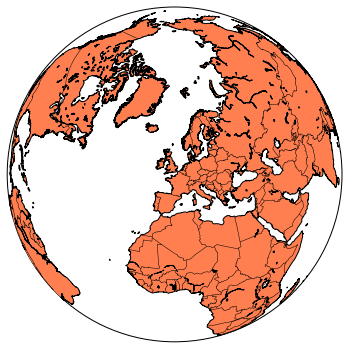

In [3]:
#Create a simple basemap- add country colours and borders

# make sure the value of resolution is a lowercase L,
#  for 'low', not a numeral 1
my_map = Basemap(projection='ortho', lat_0=50, lon_0=0,
              resolution='l', area_thresh=1000.0)
 
my_map.drawcoastlines()

my_map.drawcountries()
my_map.fillcontinents(color='coral')

plt.show()

Now zoom in on a region. Do this by defining the lower left and upper right corner of a region. Again, choose resolution 'l'

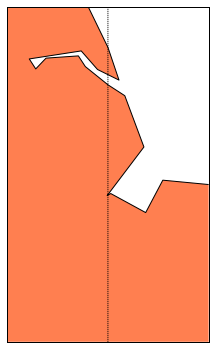

In [4]:
my_map = Basemap(projection='merc', lat_0=53, lon_0=0,
    resolution = 'l', area_thresh = 1000.0,
    llcrnrlon=-1, llcrnrlat=52,
    urcrnrlon=1, urcrnrlat=54)
 
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color='coral')
my_map.drawmapboundary()
 
my_map.drawmeridians(np.arange(0, 360, 30))
my_map.drawparallels(np.arange(-90, 90, 30))
 
plt.show()

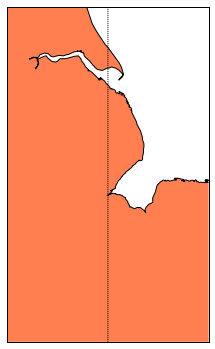

In [5]:
# Now improve resolution

my_map = Basemap(projection='merc', lat_0=53, lon_0=0,
    resolution = 'h', area_thresh = 1000.0,
    llcrnrlon=-1, llcrnrlat=52,
    urcrnrlon=1, urcrnrlat=54)
 
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color='coral')
my_map.drawmapboundary()
 
my_map.drawmeridians(np.arange(0, 360, 30))
my_map.drawparallels(np.arange(-90, 90, 30))
 
plt.show()

#### Now choose a region of interest and adjust area_threshold downwards in order to get the feature identification level right

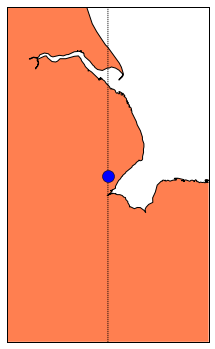

In [6]:
# Plotting points on a map

my_map = Basemap(projection='merc', lat_0=53, lon_0=0,
    resolution = 'h', area_thresh = 1000.0,
    llcrnrlon=-1, llcrnrlat=52,
    urcrnrlon=1, urcrnrlat=54)
 
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color='coral')
my_map.drawmapboundary()
 
my_map.drawmeridians(np.arange(0, 360, 30))
my_map.drawparallels(np.arange(-90, 90, 30))

lon = 0
lat = 53
#Transforms lon and lat 
x,y = my_map(lon, lat)
my_map.plot(x, y, 'bo', markersize=12)
plt.show()

* Add some additional points
* Experiment with marker types (bo = blue circle for example)
* How do you add labels to the points?

### Plotting some live (ish) earthquake data...

Download the data first:
    http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/1.0_week.csv
        
(This will download a file locally- move it into your working directory)

In [8]:
#Check the first few lats and longs

import csv

# Open the earthquake data file.
filename = '1.0_week.csv'

# Create empty lists for the latitudes and longitudes.
lats, lons = [], []

# Read through the entire file, skip the first line,
#  and pull out just the lats and lons.
with open(filename) as f:
    # Create a csv reader object.
    reader = csv.reader(f)
    
    # Ignore the header row.
    next(reader)
    
    # Store the latitudes and longitudes in the appropriate lists.
    for row in reader:
        lats.append(float(row[1]))
        lons.append(float(row[2]))
        
# Display the first 5 lats and lons.
print('lats', lats[0:5])
print('lons', lons[0:5])

lats [33.5871658, 32.9771652, 37.9516678, 19.4031658, 36.4623]
lons [-116.7591629, -116.4209976, -122.116333, -155.4875031, -98.6792]


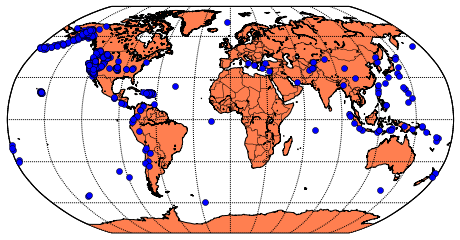

In [9]:
### And now create a plot of these on a map projection

import csv

# Open the earthquake data file.
filename = '1.0_week.csv'

# Create empty lists for the latitudes and longitudes.
lats, lons = [], []

# Read through the entire file, skip the first line,
#  and pull out just the lats and lons.
with open(filename) as f:
    # Create a csv reader object.
    reader = csv.reader(f)
    
    # Ignore the header row.
    next(reader)
    
    # Store the latitudes and longitudes in the appropriate lists.
    for row in reader:
        lats.append(float(row[1]))
        lons.append(float(row[2]))
 
# --- Build Map ---
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
 
eq_map = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0,
              lat_0=52, lon_0=0)
eq_map.drawcoastlines()
eq_map.drawcountries()
eq_map.fillcontinents(color = 'coral')
eq_map.drawmapboundary()
eq_map.drawmeridians(np.arange(0, 360, 30))
eq_map.drawparallels(np.arange(-90, 90, 30))
 
x,y = eq_map(lons, lats)
eq_map.plot(x, y, 'bo', markersize=6)
 
plt.show()